In [1]:
# MODEL = "meta-llama/Llama-2-7b-hf"
MODEL = "meta-llama/Meta-Llama-3.1-8B"

In [2]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/edenn-evals")

# Placeholder for confusion matrix values
rtn_mses, rtn_ppls, rtn_bitwidhts = [], [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.summary.get("model")
    mse = run.summary.get("expected_mse")
    ppl = run.summary.get("wikitext2_PPL")
    bitwidht = run.summary.get("bitwidth")
    
    # print(f"{model=} {mse=} {ppl=}")
    if mse is not None and ppl is not None and run.name.split(",")[0].split("=")[1][1:-1] == MODEL:
        rtn_mses.append(mse)
        rtn_ppls.append(ppl)
        rtn_bitwidhts.append(bitwidht)
        
rtn_mses = np.asarray(rtn_mses)
rtn_ppls = np.asarray(rtn_ppls)
rtn_bitwidhts = np.asarray(rtn_bitwidhts)

In [3]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/edenn-gptq")

# Placeholder for confusion matrix values
gptq_mses, gptq_ppls, gptq_bitwidhts = [], [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.summary.get("model")
    mse = run.summary.get("expected_mse")
    ppl = run.summary.get("wikitext2_PPL")
    bitwidht = run.summary.get("bitwidth")
    
    # print(f"{model=} {mse=} {ppl=}")
    if mse is not None and ppl is not None and run.name.split(",")[0].split("=")[1][1:-1] == MODEL:
        gptq_mses.append(mse)
        gptq_ppls.append(ppl)
        gptq_bitwidhts.append(bitwidht)
        
gptq_mses = np.asarray(gptq_mses)
gptq_ppls = np.asarray(gptq_ppls)
gptq_bitwidhts = np.asarray(gptq_bitwidhts)

In [4]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/NOISY_MSE_GALQIWI")

# Placeholder for confusion matrix values
noisy_mses, noisy_ppls = [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    mse = run.summary.get("relative_mse")
    ppl = run.summary.get("wikitext2")
    
    # print(f"{model=} {mse=} {ppl=}")
    if mse is not None and ppl is not None and run.name == MODEL.split("/")[-1]:
        noisy_mses.append(float(mse))
        noisy_ppls.append(float(ppl))

noisy_mses = np.asarray(noisy_mses)
noisy_ppls = np.asarray(noisy_ppls)

Text(0.5, 1.0, 'meta-llama/Meta-Llama-3.1-8B')

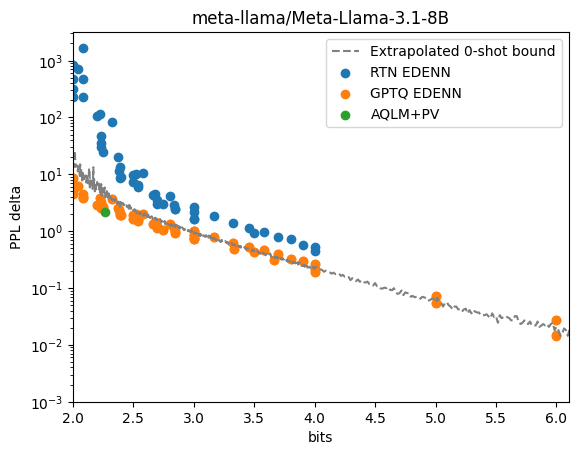

In [5]:
import matplotlib.pyplot as plt
import numpy as np


noisy_bitwidhts = - np.log2(noisy_mses) / 2
noisy_bitwidhts_order = np.argsort(noisy_bitwidhts)
plt.plot(
    noisy_bitwidhts[noisy_bitwidhts_order], noisy_ppls[noisy_bitwidhts_order] - np.min(rtn_ppls),
    color="gray", linestyle="--", label="Extrapolated 0-shot bound",
)


plt.scatter(
    rtn_bitwidhts, rtn_ppls - np.min(rtn_ppls),
    label="RTN EDENN",
)

plt.scatter(
    gptq_bitwidhts, gptq_ppls - np.min(rtn_ppls),
    label="GPTQ EDENN",
)

if MODEL == "meta-llama/Meta-Llama-3.1-8B":
    plt.scatter(
        [2.27], [7.75 - np.min(rtn_ppls)],
        label="AQLM+PV",
    )
elif MODEL == "meta-llama/Llama-2-7b-hf":
    plt.scatter(
        [2.02, 2.29], [5.84 - np.min(rtn_ppls), 5.678532600402832 - np.min(rtn_ppls)],
        label="AQLM+PV",
    )
    plt.scatter(
        [2.02, 2.29, 3.04, 4.04], [6.688191890716553 - np.min(rtn_ppls), 5.922969818115234 - np.min(rtn_ppls), 5.46 - np.min(rtn_ppls), 5.21 - np.min(rtn_ppls)],
        label="AQLM",
    )
    plt.scatter(
        [2.00, 3.00, 4.00], [5.91 - np.min(rtn_ppls), 5.29 - np.min(rtn_ppls), 5.17 - np.min(rtn_ppls)],
        label="QTIP",
    )

plt.yscale("log")
plt.xlim(2, 6.1)
plt.ylim(10**-3, 10**3.5)

plt.xlabel("bits")
plt.ylabel("PPL delta")
plt.legend()
plt.title(MODEL)

In [6]:
print(np.min(rtn_ppls))

5.606886386871338


In [7]:
# MODEL = "meta-llama/Llama-2-7b-hf"
MODEL = "meta-llama/Meta-Llama-3.1-8B"

import wandb
import numpy as np
from tqdm.auto import tqdm

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/NOISY_MSE_ONE_LAYER_GALQIWI_PPL")

# Placeholder for confusion matrix values
mses, ppls, bitwidhts, block_ids = [], [], [], []

# Iterate over runs and extract confusion matrix data
for run in tqdm(project_runs):
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.config.get("base_model")
    mse = run.summary.get("relative_mse")
    ppl = run.summary.get("wikitext2")
    bitwidht = run.summary.get("effective_wbits")
    block_id = run.config.get("layer_idx")
    
    # print(f"{model=} {block_id=} {mse=} {ppl=}")
    if mse is not None and ppl is not None:
        mses.append(mse)
        ppls.append(ppl)
        bitwidhts.append(bitwidht)
        block_ids.append(block_id)
        
mses = np.asarray(mses)
ppls = np.asarray(ppls)
bitwidhts = np.asarray(bitwidhts)
block_ids = np.asarray(block_ids)

order = np.argsort(mses)
mses = mses[order]
ppls = ppls[order]
bitwidhts = bitwidhts[order]
block_ids = block_ids[order]

  0%|          | 0/9305 [00:00<?, ?it/s]

/tmp/ipykernel_932618/3110933079.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slopes[block_id] = slope


Text(0, 0.5, 'PPL Gap')

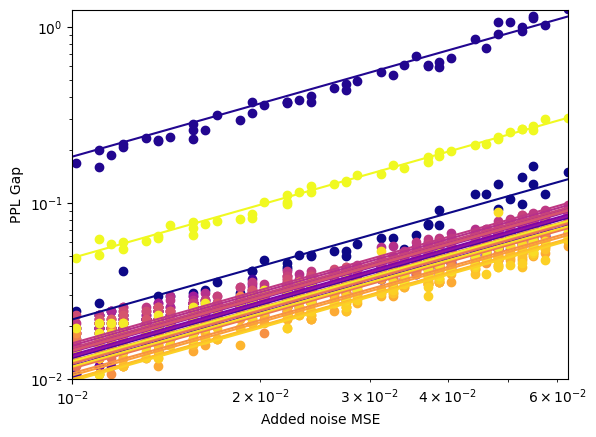

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

slopes = np.empty((32,))
intercept = np.min(rtn_ppls)

cmap = mpl.colormaps["plasma"]

for block_id in range(32):
    this_layer_pos = (block_ids == block_id)
    
    plt.scatter(
        mses[this_layer_pos],
        ppls[this_layer_pos] - intercept,
        label=f"{block_id}",
        color=cmap(block_id/31),
    )
    
    this_layer_pos = (block_ids == block_id) & (mses <= 4**(-2))
    
    slope, _, _, _ = np.linalg.lstsq(mses[this_layer_pos][:, None], ppls[this_layer_pos] - intercept, rcond=None)
    
    plt.plot(
        np.linspace(0, 4**(-2)),
        slope * np.linspace(0, 4**(-2)),
        color=cmap(block_id/31),
        # linestyle=(0, (1, 5)),
    )
    slopes[block_id] = slope

    # plt.yscale("log")

plt.xlim(0.01, 4**(-2))
plt.ylim(0.01, 1.25)

plt.yscale("log")
plt.xscale("log")

plt.xlabel("Added noise MSE")
plt.ylabel("PPL Gap")

Text(0.5, 1.0, 'Optimal block-wise BPW, meta-llama/Meta-Llama-3.1-8B')

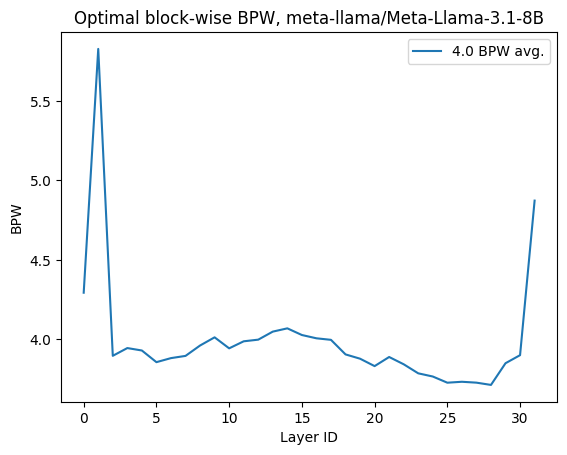

In [9]:
from scipy.optimize import minimize


def get_optimal_blockwise_bitwidths(slopes, budget):
    bitwidhts = np.log2(slopes) / 2
    return bitwidhts - bitwidhts.mean() + budget


def expected_ppl_gap(slopes, allocated_bitwidths):
    return np.sum(slopes * np.power(4, -allocated_bitwidths))

for budget in (4.0,):
    plt.plot(get_optimal_blockwise_bitwidths(slopes, budget), label=f"{budget} BPW avg.")
    
plt.xlabel("Layer ID")
plt.ylabel("BPW")

plt.legend()
plt.title(f"Optimal block-wise BPW, {MODEL}")

In [10]:
from sklearn.linear_model import LinearRegression

ref_sum_slope = LinearRegression(fit_intercept=False).fit(noisy_mses[noisy_mses < 4**-3].reshape(-1, 1), noisy_ppls[noisy_mses < 4**-3] - np.min(rtn_ppls)).coef_

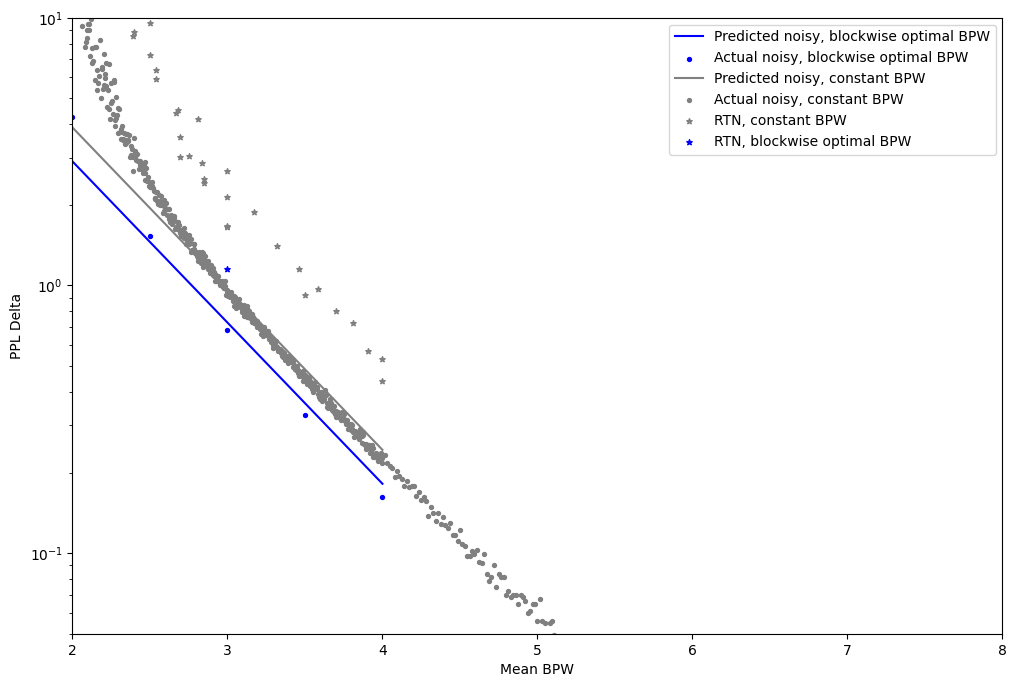

In [11]:
plt.rcParams['figure.figsize'] = [12, 8]

bpws = [2, 2.5, 3, 3.5, 4.0]
actual = [9.854679107666016, 7.133002281188965, 6.286427021026611, 5.935948848724365, 5.768750190734863]
rtn = [None, None, 6.754897594451904, None, None]

# NOISE BLOCKWISE BPW
plt.plot(
    np.linspace(2, 4),
    [expected_ppl_gap(slopes, get_optimal_blockwise_bitwidths(slopes, bpw)) for bpw in np.linspace(2, 4)],
    color="blue", label="Predicted noisy, blockwise optimal BPW",
)
plt.scatter(bpws, actual  - np.min(rtn_ppls), s=8, color="blue", label="Actual noisy, blockwise optimal BPW")


# NISE CONSTANT BPW
plt.plot(
    np.linspace(2, 4),
    [expected_ppl_gap(slopes, np.array([bpw for _ in range(32)])) for bpw in np.linspace(2, 4)],
    color="gray", label="Predicted noisy, constant BPW",
)
plt.scatter(
    noisy_bitwidhts[noisy_bitwidhts_order], noisy_ppls[noisy_bitwidhts_order] - np.min(rtn_ppls),
    color="gray", s=8, label="Actual noisy, constant BPW",
)

# GPTQ
# plt.scatter(
#     gptq_bitwidhts, gptq_ppls - np.min(rtn_ppls), 
#     color="green", marker="*", s=16, label="GPTQ, constant BPW",
# )

# RTN CONSTANT BPW
plt.scatter(
    rtn_bitwidhts, rtn_ppls - np.min(rtn_ppls),
    color="gray", s=16, marker="*", label="RTN, constant BPW",
)

# RTN OPTIMAL BPW
plt.scatter(
    [3.0], 6.754897594451904 - np.min(rtn_ppls),
    color="blue", s=16, marker="*", label="RTN, blockwise optimal BPW",
)

plt.xlabel("Mean BPW")
plt.ylabel("PPL Delta")

plt.yscale("log")
plt.xlim(2, 8)
plt.ylim(0.05, 10)

plt.legend()

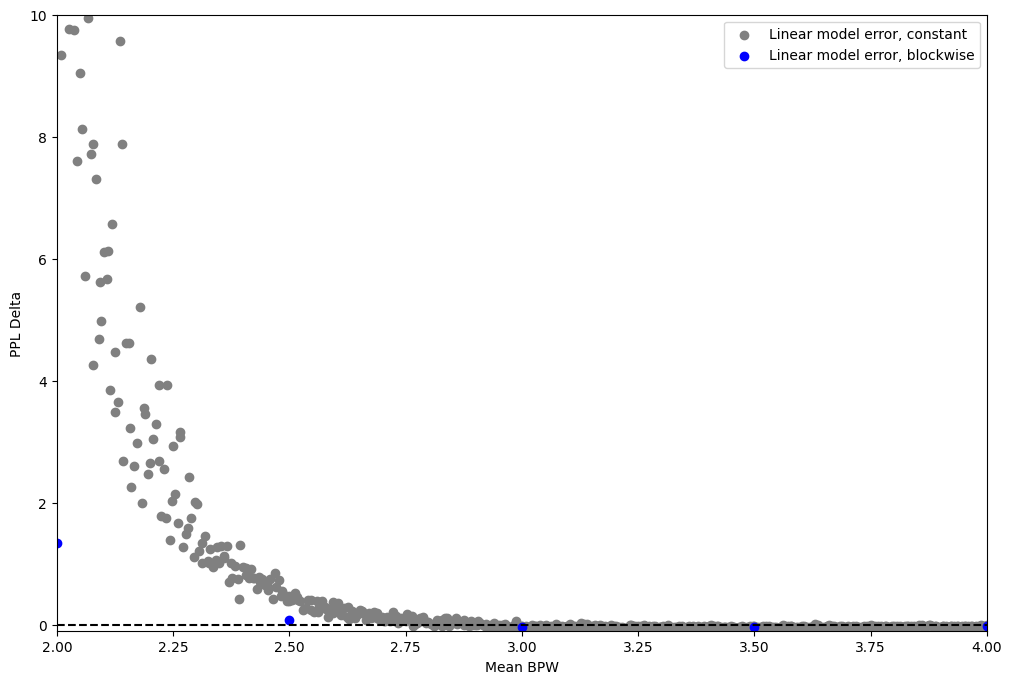

In [12]:
linear_model_constant_ppls = np.asarray([expected_ppl_gap(slopes, np.array([bpw for _ in range(32)])) for bpw in noisy_bitwidhts[noisy_bitwidhts_order]])

plt.scatter(
    noisy_bitwidhts[noisy_bitwidhts_order], (noisy_ppls[noisy_bitwidhts_order] - np.min(rtn_ppls)) - linear_model_constant_ppls,
    color="gray", label="Linear model error, constant",
)
plt.scatter(
    bpws, (actual - np.min(rtn_ppls)) - np.asarray([expected_ppl_gap(slopes, get_optimal_blockwise_bitwidths(slopes, bpw)) for bpw in bpws]),
    color="blue", label="Linear model error, blockwise",
)
plt.axhline(0, color="black", linestyle="--")

plt.xlabel("Mean BPW")
plt.ylabel("PPL Delta")

plt.xlim(2, 4)
plt.ylim(-0.1, 10)

plt.legend()

In [13]:
import math
from os import listdir
from os.path import isfile, join

for i in range(16):
    assert int(math.log2(2**i)) == i

grids_path = "../grids"
grids = [f for f in listdir(grids_path) if isfile(join(grids_path, f))]

good_grids = []

for grid in sorted(grids):
    grid_signature = grid[4:-3].split("-")
    
    edenn_d = int(grid_signature[0])
    edenn_n = int(grid_signature[1])
    
    # print(f"{edenn_d} {edenn_n}:", end=" ")
    if edenn_n & (edenn_n-1) != 0:
        # print(f"not power of 2")
        continue
    
    if edenn_n * edenn_d * 2 > 64 * 1024:
        # print(f"too large")
        continue
    
    # print("good")
    good_grids.append((edenn_d, edenn_n))

In [14]:
%env CUDA_VISIBLE_DEVICES=6

import torch
from edenn import higgs_quantize_dequantize

@torch.no_grad()
def eval_grid(edenn_d: int, edenn_n: int):
    x = torch.empty((2**18, edenn_d), device="cuda").normal_()
    dequant, entropy = higgs_quantize_dequantize(x, edenn_d, edenn_n)
    mse = (x - dequant).pow(2).mean().item()
    return mse, entropy / edenn_d

good_grids_with_mse = []
for (edenn_d, edenn_n) in good_grids:
    mse, entropy = eval_grid(edenn_d, edenn_n)
    good_grids_with_mse.append({
            "name": f"edenn_{edenn_d}_{edenn_n}",
            "mse": mse, "bits": math.log2(edenn_n) / edenn_d,
            "edenn_d": edenn_d, "edenn_n": edenn_n, "entropy": entropy
    })

env: CUDA_VISIBLE_DEVICES=6


In [15]:
from e8p2 import QUIP_SHARP_QUANTIZER_2
from e8p3 import QUIP_SHARP_QUANTIZER_3
from e8p4 import QUIP_SHARP_QUANTIZER_4

with torch.no_grad():
    x = torch.empty((2**18, 8), device="cuda").normal_()
    dequant = QUIP_SHARP_QUANTIZER_2.quantize(x, return_idx=False)
    quip_sharp_2_mse = (x - dequant).pow(2).mean().item()
    
    dequant = QUIP_SHARP_QUANTIZER_3.quantize(x, return_idx=False)
    quip_sharp_3_mse = (x - dequant).pow(2).mean().item()
    
    dequant = QUIP_SHARP_QUANTIZER_4.quantize(x, return_idx=False)
    quip_sharp_4_mse = (x - dequant).pow(2).mean().item()
    
    quip_sharp_grids = [
        {"name": "quipsharp_2", "mse": quip_sharp_2_mse, "bits": 2},
        {"name": "quipsharp_3", "mse": quip_sharp_3_mse, "bits": 3},
        {"name": "quipsharp_4", "mse": quip_sharp_4_mse, "bits": 4},
    ]

In [16]:
bnb_grids = [
    {"name": "int8", "mse": 0.00017070770263671875, "bits": 8 + 16 / 4096},
    {"name": "nf4", "mse": 0.0084228515625, "bits": 4 + 16 / 64},
    # {"name": "fp16", "mse": 0.0, "bits": 16},
]

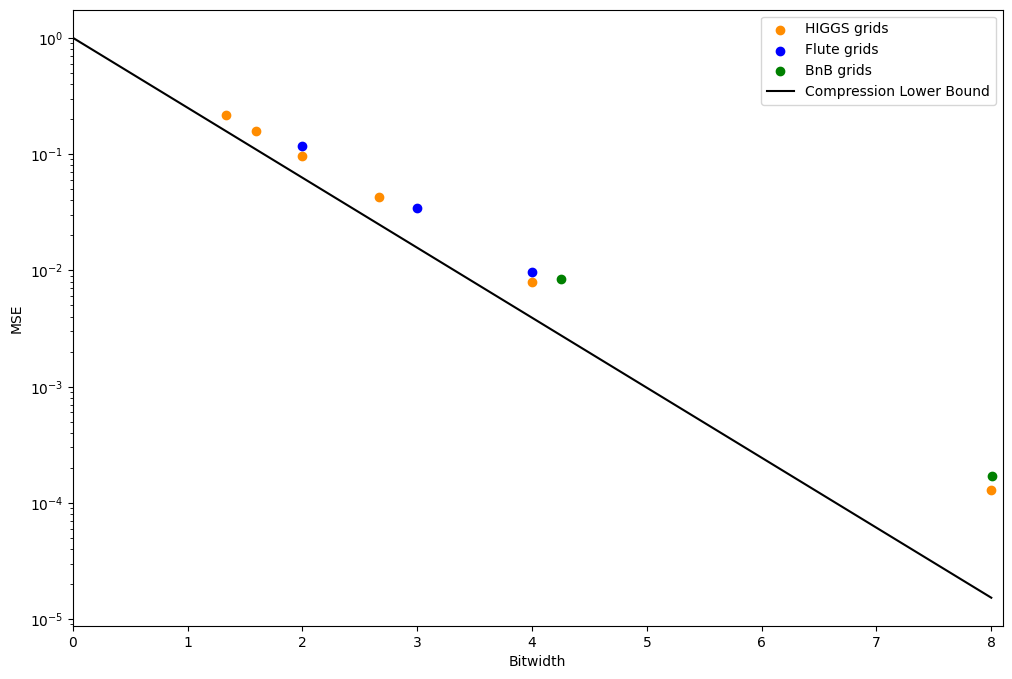

In [17]:
import numpy as np
import matplotlib.pyplot as plt

higgs_grids = [grid for grid in good_grids_with_mse if grid['edenn_n'] == 256 and grid['bits'] >= 1.3]
flute_grids = [grid for grid in good_grids_with_mse if grid["edenn_n"] in [4, 8, 16] and grid["edenn_d"] == 1]
combo_grids = flute_grids + bnb_grids # + quip_sharp_grids

# plt.scatter([v["bits"] for v in good_grids_with_mse], [v["mse"] for v in good_grids_with_mse], label="All grids")
plt.scatter([v["bits"] for v in higgs_grids], [v["mse"] for v in higgs_grids], color="darkorange", label="HIGGS grids")
plt.scatter([v["bits"] for v in flute_grids], [v["mse"] for v in flute_grids], color="blue", label="Flute grids")
# plt.scatter([v["bits"] for v in quip_sharp_grids], [v["mse"] for v in quip_sharp_grids], label="QuIP# grids")
plt.scatter([v["bits"] for v in bnb_grids], [v["mse"] for v in bnb_grids], color="green", label="BnB grids")

plt.plot(np.linspace(0, 8), np.power(4, -np.linspace(0, 8)), color="black", label="Compression Lower Bound")

plt.xlabel("Bitwidth")
plt.ylabel("MSE")

plt.yscale("log")
plt.xlim(0, 8.1)

plt.legend()

In [18]:
from ortools.linear_solver import pywraplp

def find_grids_with_budget(
    slopes,    # linear coefficients for [layerwise mse -> metric]
    weights,   # linear coefficients for [layer bitwidth -> total bitwidth] (1 / num_blocks for blockwise)
    budget,    # upper bound on total bitwidth
    grid_bits, # available grid bitwidths
    grid_mses  # available grid mses
) -> tuple[float, list]:
    num_layers = len(slopes)
    num_grids = len(grid_bits)
    assert len(grid_mses) == num_grids
    
    solver = pywraplp.Solver.CreateSolver("CP-SAT")

    x = {(j, i) : solver.BoolVar("name") for i in range(num_grids) for j in range(num_layers)}
    
    for j in range(num_layers) : solver.Add(sum(x[(j, i)] for i in range(num_grids)) == 1)
    solver.Add(sum(x[(j, i)] * weights[j] * grid_bits[i] for j in range(num_layers) for i in range(num_grids)) <= budget + 1e-5)
    solver.Minimize(sum(x[(j, i)] * slopes[j] * grid_mses[i] for j in range(num_layers) for i in range(num_grids)))

    status = solver.Solve()
    if status == pywraplp.Solver.OPTIMAL:
        avg_bits = sum(x[(j, i)].solution_value() * weights[j] * grid_bits[i] for j in range(num_layers) for i in range(num_grids))
        solution = np.asarray([[x[(j, i)].solution_value() for i in range(num_grids)] for j in range(num_layers)])
        indices = np.argwhere(solution == 1.0)
        assert len(indices) == num_layers
        return avg_bits, indices[:,1]
    else:
        raise Exception(f"Didn't solve: {status}")

Processing bitwidths...:   0%|          | 0/40 [00:00<?, ?it/s]

Text(0, 0.5, 'Selected Bitwidht')

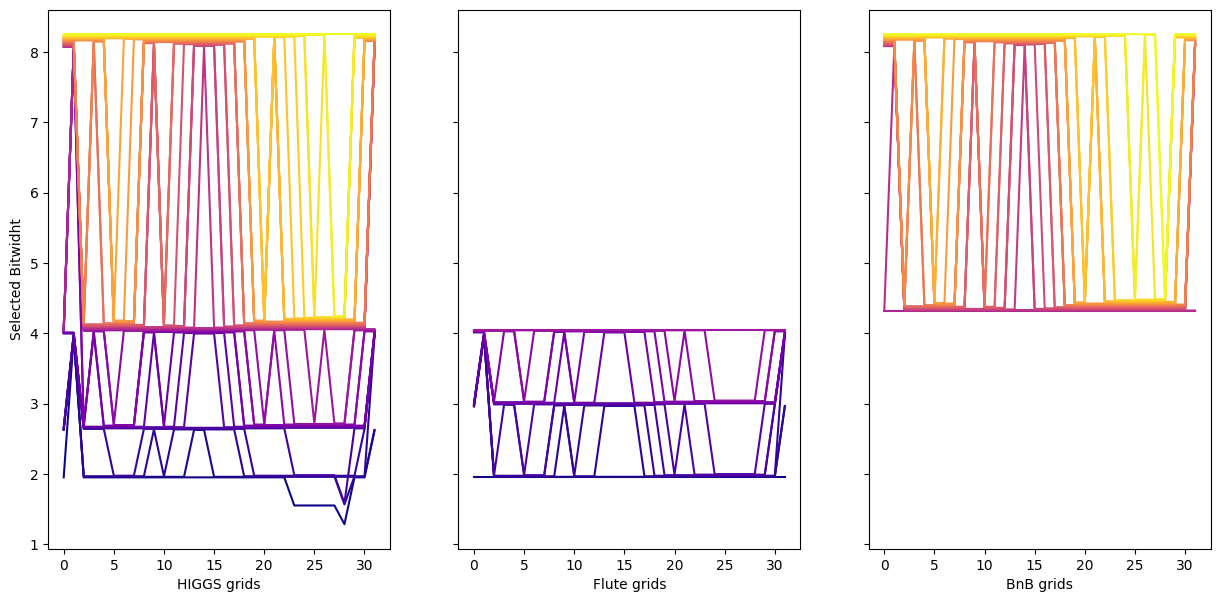

In [19]:
cmap = mpl.colormaps["plasma"]

any_configurations = set()
higgs_configurations = set()
flute_configurations = set()
quip_sharp_configurations = set()
bnb_configurations = set()
combo_configurations = set()

fig, axs = plt.subplots(1, 3, figsize=(15, 7), sharey=True)

for target_bitwidht in tqdm(np.linspace(2.0, 8.0, num=40), desc="Processing bitwidths..."):
    # ANY
    # girds_to_map_to = good_grids_with_mse # any
    # avg_bits, indices = find_grids_with_budget(slopes, np.ones((32,)) / 32, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
    # if tuple(indices) not in any_configurations:
    #     axs[0].plot(
    #         np.array([girds_to_map_to[i]["bits"] for i in indices]) + 0.05 * (target_bitwidht - 3.0),
    #         color=cmap((target_bitwidht -  2) / (8 - 2)),
    #         label=f"Avg. Bitwidth: {avg_bits:.2f} < {target_bitwidht:.2f}"
    #     )
    #     any_configurations.add(tuple(indices))
    
    # HIGGS
    girds_to_map_to = higgs_grids
    avg_bits, indices = find_grids_with_budget(slopes, np.ones((32,)) / 32, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
    if tuple(indices) not in higgs_configurations:
        axs[0].plot(
            np.array([girds_to_map_to[i]["bits"] for i in indices]) + 0.05 * (target_bitwidht - 3.0),
            color=cmap((target_bitwidht -  2) / (8 - 2)),
            label=f"Avg. Bitwidth: {avg_bits:.2f} < {target_bitwidht:.2f}"
        )
        higgs_configurations.add(tuple(indices))
        
    # FLUTE
    if target_bitwidht <= 4:
        girds_to_map_to = flute_grids
        avg_bits, indices = find_grids_with_budget(slopes, np.ones((32,)) / 32, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
        if tuple(indices) not in flute_configurations:
            axs[1].plot(
                np.array([girds_to_map_to[i]["bits"] for i in indices]) + 0.05 * (target_bitwidht - 3.0),
                color=cmap((target_bitwidht -  2) / (8 - 2)),
                label=f"Avg. Bitwidth: {avg_bits:.2f} < {target_bitwidht:.2f}"
            )
            flute_configurations.add(tuple(indices))
        
    # QuIP#
    if target_bitwidht <= 4:
        girds_to_map_to = quip_sharp_grids
        avg_bits, indices = find_grids_with_budget(slopes, np.ones((32,)) / 32, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
        if tuple(indices) not in quip_sharp_configurations:
            # axs[3].plot(
            #     np.array([girds_to_map_to[i]["bits"] for i in indices]) + 0.05 * (target_bitwidht - 3.0),
            #     color=cmap((target_bitwidht -  2) / (8 - 2)),
            #     label=f"Avg. Bitwidth: {avg_bits:.2f} < {target_bitwidht:.2f}"
            # )
            quip_sharp_configurations.add(tuple(indices))
    
    # BnB
    if target_bitwidht >= 4.25:
        girds_to_map_to = bnb_grids
        avg_bits, indices = find_grids_with_budget(slopes, np.ones((32,)) / 32, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
        if tuple(indices) not in bnb_configurations:
            axs[2].plot(
                np.array([girds_to_map_to[i]["bits"] for i in indices]) + 0.05 * (target_bitwidht - 3.0),
                color=cmap((target_bitwidht -  2) / (8 - 2)),
                label=f"Avg. Bitwidth: {avg_bits:.2f} < {target_bitwidht:.2f}"
            )
            bnb_configurations.add(tuple(indices))
    
    # FLUTE + bnb
    girds_to_map_to = combo_grids
    avg_bits, indices = find_grids_with_budget(slopes, np.ones((32,)) / 32, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
    if tuple(indices) not in combo_configurations:
        # axs[4].plot(
        #     np.array([girds_to_map_to[i]["bits"] for i in indices]) + 0.05 * (target_bitwidht - 3.0),
        #     color=cmap((target_bitwidht -  2) / (8 - 2)),
        #     label=f"Avg. Bitwidth: {avg_bits:.2f} < {target_bitwidht:.2f}"
        # )
        combo_configurations.add(tuple(indices))

axs[0].set_xlabel("HIGGS grids")
axs[1].set_xlabel("Flute grids")
axs[2].set_xlabel("BnB grids")
axs[0].set_ylabel("Selected Bitwidht")

In [20]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/higgs-evals")

# Placeholder for confusion matrix values
higgs_ppls, higgs_blockwise_configs = [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.summary.get("model")
    ppl = run.summary.get("wikitext2_PPL")
    higgs_config = run.config.get("blockwise")
    
    # print(f"{model=} {mse=} {ppl=}")
    if ppl is not None and higgs_config is not None and model == MODEL:
        higgs_ppls.append(ppl)
        higgs_blockwise_configs.append(higgs_config)
        
higgs_ppls = np.asarray(higgs_ppls)
higgs_blockwise_configs = np.asarray(higgs_blockwise_configs)

higgs_bitwisths = (np.log2(higgs_blockwise_configs[:,:,1]) / higgs_blockwise_configs[:,:,0]).mean(axis=-1)

measured_higgs_configs = set()

for measured_config in higgs_blockwise_configs:
    mapped_config = []
    for block in measured_config:
        for i, grid in enumerate(higgs_grids):
            if grid["edenn_d"] == int(block[0]) and grid["edenn_n"] == int(block[1]):
                mapped_config.append(i)
                break
        else:
            raise Exception(f"Coudn't map grid {block}!")
        
    measured_higgs_configs.add(tuple(mapped_config))


In [21]:
def get_bitwidth(weights, grid_bits, selection):
    return (weights * grid_bits[selection]).sum()

import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/bnb-evals")

# Placeholder for confusion matrix values
bnb_ppls, bnb_blockwise_configs = [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.summary.get("model")
    ppl = run.summary.get("wikitext2_PPL")
    bnb_config = run.config.get("blockwise")
    
    # print(f"{model=} {mse=} {ppl=}")
    if ppl is not None and bnb_config is not None and model == MODEL:
        bnb_ppls.append(ppl)
        bnb_blockwise_configs.append(bnb_config)
        
bnb_ppls = np.asarray(bnb_ppls)
bnb_bitwidths = []

bnb_blockwise_configs = np.asarray(bnb_blockwise_configs)

measured_bnb_configs = set()

for measured_config in bnb_blockwise_configs:
    mapped_config = []
    for block in measured_config:
        for i, grid in enumerate(bnb_grids):
            if grid["name"] == block:
                mapped_config.append(i)
                break
        else:
            raise Exception(f"Coudn't map grid {block}!")
        
    measured_bnb_configs.add(tuple(mapped_config))
    bnb_bitwidths.append(
        get_bitwidth(
            np.ones((32,)) / 32,
            np.asarray([grid["bits"] for grid in bnb_grids]),
            np.asarray(mapped_config),
        )
    )
    
bnb_bitwidths = np.asarray(bnb_bitwidths)


In [22]:
## BNB

import pandas as pd

def str2frame(estr, sep = ',', lineterm = '\n', set_header = True):
    dat = [x.split(sep) for x in estr.strip(lineterm).split(lineterm)]
    df = pd.DataFrame(dat)
    if set_header:
        df = df.T.set_index(0, drop = True).T # flip, set ix, flip back
    return df

df = str2frame(""",solution_size,solution_pred_err,solution_real_err
0,4.25,0.5390484014367625,0.3602409362792969
1,4.603024488304094,0.3115161988459959,0.2638068199157715
2,5.073723806042885,0.26045065436376247,0.22072649002075195
3,5.426748294346979,0.22466796962048444,0.18700647354125977
4,5.89744761208577,0.1796151688197496,0.14834213256835938
5,6.368146929824562,0.13722805568444696,0.11121177673339844
6,6.721171418128655,0.1071288431758188,0.08701467514038086
7,7.191870735867447,0.06912787916274939,0.060390472412109375
8,7.662570053606238,0.034763277199971875,0.0313725471496582
9,8.015594541910332,0.010925007230206125,0.008766651153564453""").astype(float)

df["bitwidht"] = df["solution_size"]

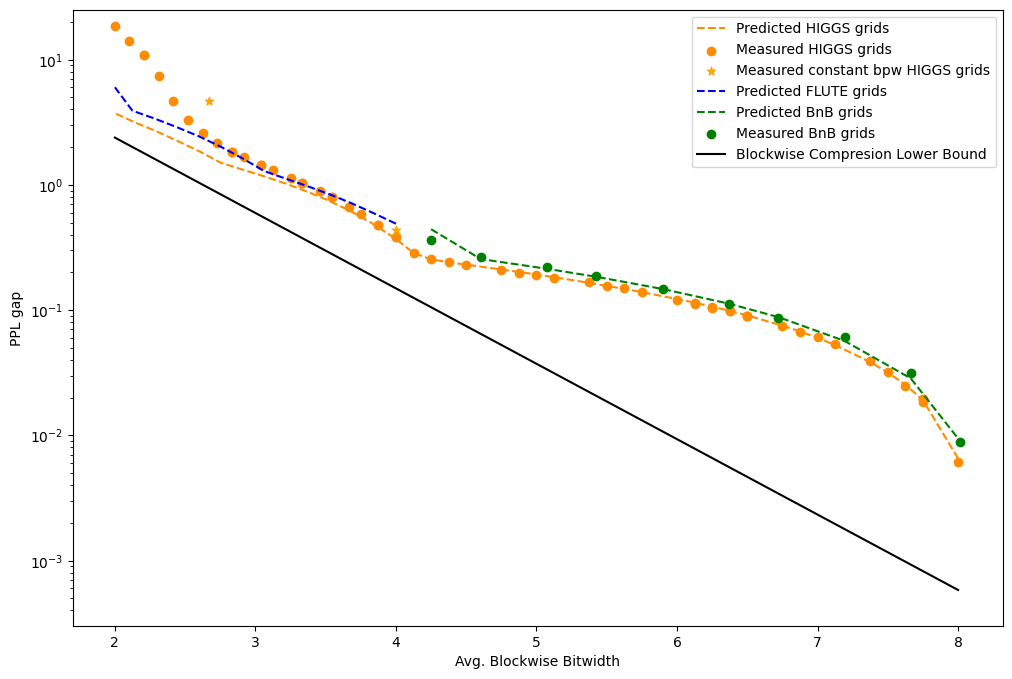

In [112]:
KOSTIL = 0.82 # ref_sum_slope / sum(slopes) # 1

def get_expected_ppl_gap(slopes, grid_mses, selection):
    return (grid_mses[selection] * slopes).sum()

def get_bitwidth(weights, grid_bits, selection):
    return (weights * grid_bits[selection]).sum()

# ANY
temp_ppl_gaps = []
temp_bitwidths = []
for indices in any_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in good_grids_with_mse]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in good_grids_with_mse]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
# plt.plot(temp_bitwidths[order], temp_ppl_gaps[order], color="gray", linestyle="--", label=f"Predicted any grids")

# HIGGS
temp_ppl_gaps = []
temp_bitwidths = []
for indices in higgs_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in higgs_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in higgs_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
plt.plot(temp_bitwidths[order], temp_ppl_gaps[order] * KOSTIL, linestyle="--", color="darkorange", label=f"Predicted HIGGS grids")

plt.scatter(
    higgs_bitwisths,
    higgs_ppls - np.min(rtn_ppls),
    color="darkorange", marker="o", label="Measured HIGGS grids"
)

plt.scatter(
    [8/4, 8/3, 8/2],
    np.asarray([300.50626, 10.31264, 6.03953]) - np.min(rtn_ppls),
    color="orange", marker="*", label="Measured constant bpw HIGGS grids"
)

# FLUTE
temp_ppl_gaps = []
temp_bitwidths = []
for indices in flute_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in flute_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in flute_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
plt.plot(temp_bitwidths[order], temp_ppl_gaps[order] * KOSTIL, linestyle="--", color="blue", label=f"Predicted FLUTE grids")

# QuIP#
temp_ppl_gaps = []
temp_bitwidths = []
for indices in quip_sharp_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in quip_sharp_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in quip_sharp_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
# plt.plot(temp_bitwidths[order], temp_ppl_gaps[order], linestyle="--", color="blue", label=f"Predicted QuIP# grids")

# BnB
temp_ppl_gaps = []
temp_bitwidths = []
for indices in bnb_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in bnb_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in bnb_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
plt.plot(
    df["bitwidht"], # temp_bitwidths[order],
    df["solution_pred_err"] * KOSTIL, # temp_ppl_gaps[order] * KOSTIL,
    linestyle="--", color="green", label=f"Predicted BnB grids"
)

# plt.scatter(
#     bnb_bitwidths,
#     bnb_ppls - np.min(rtn_ppls),
#     color="green", marker="o", label="Measured BnB grids"
# )

plt.scatter(
    df["bitwidht"],
    df["solution_real_err"],
    color="green", marker="o", label="Measured BnB grids"
)


# FLUTE+BnB
temp_ppl_gaps = []
temp_bitwidths = []
for indices in combo_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in combo_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in combo_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
# plt.plot(temp_bitwidths[order], temp_ppl_gaps[order], linestyle="--", label=f"Predicted FLUTE+BnB grids")

plt.plot(
    np.linspace(2, 8),
    [expected_ppl_gap(slopes, get_optimal_blockwise_bitwidths(slopes, bpw)) * KOSTIL for bpw in np.linspace(2, 8)],
    color="black", label="Blockwise Compresion Lower Bound",
)

plt.xlabel("Avg. Blockwise Bitwidth")
plt.ylabel("PPL gap")

plt.yscale('log')
plt.ylim(None, 25)
# plt.xlim(2, 4.1)

# plt.ylim(0, 1)

plt.legend()

In [24]:
import subprocess

chosen_grids = higgs_grids
chosen_configurations = higgs_configurations

for indices in tqdm(chosen_configurations):
    bitwidth = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in chosen_grids]),
        np.asarray(indices),
    )
    
    if indices in measured_higgs_configs:
        print(f"Skipping {bitwidth:.2f}")
        continue
    
    if bitwidth <= 4.0:
        print(f"Skipping {bitwidth:.2f}")
        continue
    
    blockwise_string = f"""[{
        ','.join(['('+ str(chosen_grids[i]['edenn_d']) + ',' + str(chosen_grids[i]['edenn_n']) + ')' for i in indices])
    }]"""
    
    # subprocess.check_call(
    #     f"CUDA_VISIBLE_DEVICES=6 python eval_real_quant.py meta-llama/Meta-Llama-3.1-8B --blockwise '{blockwise_string}' --multiquant-ckpt-path /nfs/scistore19/alistgrp/apanfero/models/higgs/Meta-Llama-3.1-8B.pt",
    #     shell=True,
    #     cwd="../kernels",
    # )

  0%|          | 0/40 [00:00<?, ?it/s]

Skipping 5.50
Skipping 2.61
Skipping 3.04
Skipping 4.38
Skipping 5.00
Skipping 6.50
Skipping 6.25
Skipping 4.25
Skipping 2.75
Skipping 6.00
Skipping 7.38
Skipping 5.38
Skipping 7.62
Skipping 4.88
Skipping 7.12
Skipping 2.46
Skipping 3.67
Skipping 2.92
Skipping 4.00
Skipping 2.00
Skipping 7.75
Skipping 3.83
Skipping 6.88
Skipping 8.00
Skipping 3.21
Skipping 6.12
Skipping 3.38
Skipping 2.15
Skipping 4.75
Skipping 2.30
Skipping 7.00
Skipping 3.50
Skipping 4.12
Skipping 6.75
Skipping 5.12
Skipping 7.50
Skipping 5.62
Skipping 4.50
Skipping 5.75


In [25]:
import subprocess


for indices in tqdm(bnb_configurations):
    bitwidth = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in bnb_grids]),
        np.asarray(indices),
    )
    
    if indices in measured_bnb_configs:
        print(f"Skipping {bitwidth:.2f}")
        continue
    
    blockwise_string = f"""[{
        ','.join(['"'+ bnb_grids[i]['name'] + '"' for i in indices])
    }]"""
    
    # subprocess.check_call(
    #     f"CUDA_VISIBLE_DEVICES=6 python eval_bnb.py meta-llama/Meta-Llama-3.1-8B --blockwise '{blockwise_string}'",
    #     shell=True,
    #     cwd="../bnb",
    # )

  0%|          | 0/25 [00:00<?, ?it/s]

Skipping 5.66
Skipping 6.71
Skipping 4.60
Skipping 5.19
Skipping 6.60
Skipping 6.36
Skipping 6.13
Skipping 7.65
Skipping 7.89
Skipping 5.07
Skipping 7.18
Skipping 4.25
Skipping 5.42
Skipping 7.30
Skipping 7.77
Skipping 6.24
Skipping 7.07
Skipping 4.37
Skipping 6.83
Skipping 5.31
Skipping 4.84
Skipping 5.78
Skipping 4.72
Skipping 7.53
Skipping 5.89


In [26]:
def get_df_from_wandb(path):
    api = wandb.Api()

    # Project is specified by <entity/project-name>
    runs = api.runs(path)
    
    data_df_lines = []
    for run in tqdm(runs): 
        data_df_lines.append({
            'Name': run.name,
            'Commit': run.commit,
            **run.summary._json_dict,
            **{k: v for k,v in run.config.items() if not k.startswith('_')},
        })
    data_df = pd.DataFrame(data_df_lines)
    return data_df

In [70]:
# BASE_PPL = np.min(noisy_ppls)
BASE_PPL = 5.606692790985107

# data_df = get_df_from_wandb('rock-and-roll/NOISY_MSE_ONE_LINEAR_LAYER_GALQIWI_PPL')
# data_df.to_csv("../bnb/layerwise_slopes.csv")
data_df = pd.read_csv("../bnb/layerwise_slopes.csv")

data_df['layer'] = data_df['layer_name']
data_df['mse'] = data_df['relative_mse']

data_df = data_df[data_df['base_model'] == MODEL]

data_df = data_df[['layer', 'mse', 'wikitext2']]
data_df = data_df.dropna().copy()

from sklearn.linear_model import LinearRegression

layers = sorted(set(data_df['layer']))

scale_by_layer = {}
intercept_by_layer = {}

for layer_idx, layer in enumerate(layers):
    to_fit = data_df[data_df['layer'] == layer]
    # to_fit = to_fit[to_fit['mse'] < 4 ** -1.7]
    to_fit = to_fit[to_fit['wikitext2'] < 5.640]

    slope = LinearRegression(fit_intercept=False).fit(to_fit['mse'].values.reshape(-1, 1), to_fit['wikitext2'] - BASE_PPL).coef_
    
    scale_by_layer[layer] = slope.item()
    intercept_by_layer[layer] = BASE_PPL

/tmp/ipykernel_932618/336711499.py:6: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("../bnb/layerwise_slopes.csv")


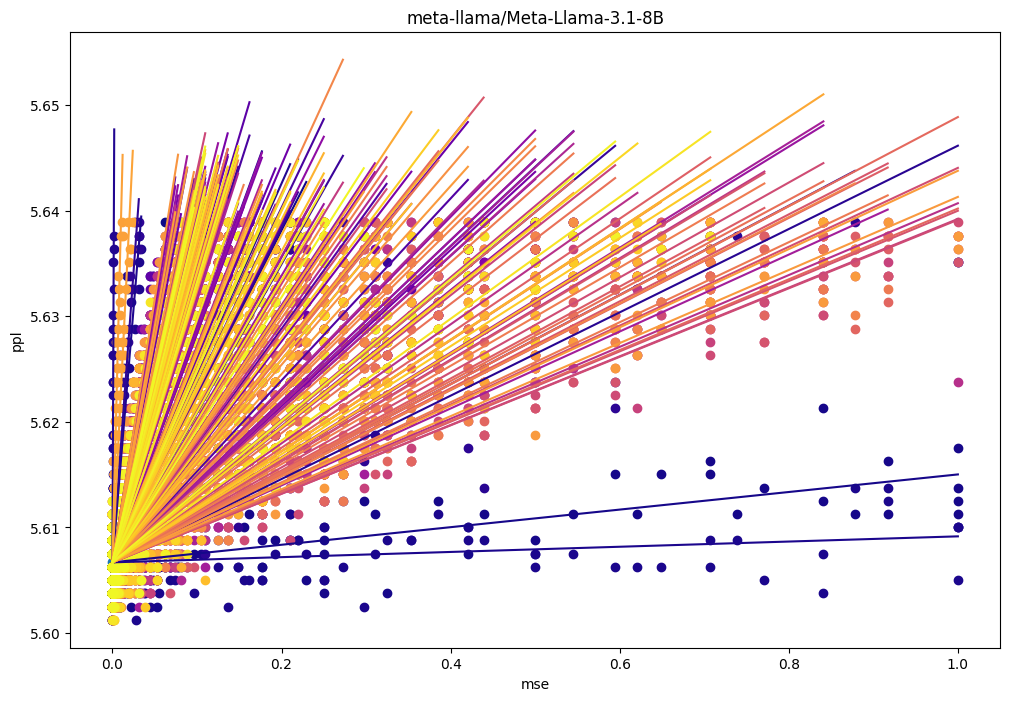

In [74]:
import re

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


cmap = matplotlib.colormaps["plasma"]

plt.scatter([0.0], [5.606692790985107])

for layer_idx, layer in enumerate(layers):
# for layer_idx, layer in enumerate(layers):
    block_idx = int(re.search('[0-9]+', layer).group())
    if block_idx != 0:
        # continue
        pass
    
    to_plot = data_df[data_df['layer'] == layer]
    # to_plot = to_plot[to_plot['mse'] < 0.01]
    to_plot = to_plot[to_plot['wikitext2'] < 5.640]
    
    plt.scatter(to_plot['mse'], to_plot['wikitext2'], color=cmap(layer_idx / len(layers)))

    grid = np.linspace(0, to_plot['mse'].max(), 10)
    
    plt.plot(grid, intercept_by_layer[layer] + grid * scale_by_layer[layer], color=cmap(layer_idx / len(layers)))


plt.title(f'{MODEL}')
plt.xlabel('mse')
plt.ylabel('ppl')
plt.savefig(f'ppl_mse.png')

In [75]:
total_params = 32 * (4096 * (2 * 4096 + 2 * 4096 * 8 / 32) + 3 * 4096 * 14336)

layerwise_weights = {}
for name in scale_by_layer:
    if "q_proj" in name or "o_proj" in name:
        layerwise_weights[name] = 4096 * 4096 / total_params
    elif "k_proj" in name or "v_proj" in name:
        layerwise_weights[name] = 4096 * 4096 * 8 / 32 / total_params
    else:
        layerwise_weights[name] = 4096 * 14336 / total_params

layerwise_slopes = np.asarray(list(scale_by_layer.values())).reshape(32, -1)[np.argsort(np.argsort([str(i) for i in range(32)]))].flatten()
layerwise_names = np.asarray(list(scale_by_layer.keys())).reshape(32, -1)[np.argsort(np.argsort([str(i) for i in range(32)]))].flatten()

layerwise_weights = np.asarray(list(layerwise_weights.values()))

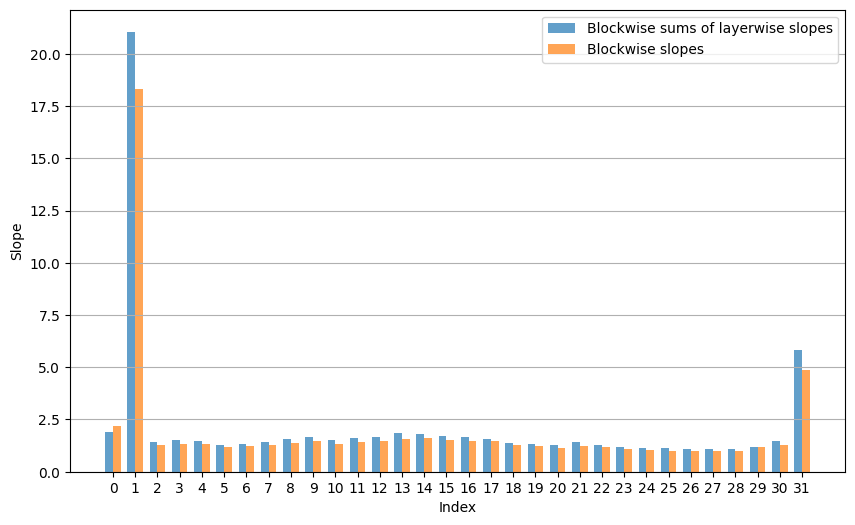

In [76]:
# Creating a bar plot for comparison
plt.figure(figsize=(10, 6))
index = np.arange(len(layerwise_slopes.reshape(32, -1).sum(axis=-1)))

bar_width = 0.35  # Width of the bars

# Plotting the bars
plt.bar(index, layerwise_slopes.reshape(32, -1).sum(axis=-1), bar_width, label='Blockwise sums of layerwise slopes', alpha=0.7)
plt.bar(index + bar_width, slopes, bar_width, label='Blockwise slopes', alpha=0.7)

# Adding titles and labels
plt.xlabel('Index')
plt.ylabel('Slope')

# Adding a legend
plt.legend()

# Display the plot
plt.grid(True, axis="y")
plt.xticks(index + bar_width / 2, index)  # Adjust the tick marks
plt.show()

In [77]:
cmap = mpl.colormaps["plasma"]

higgs_layerwise_configurations = set()
flute_layerwise_configurations = set()
bnb_layerwise_configurations = set()

for target_bitwidht in tqdm(np.linspace(2.0, 8.0, num=40), desc="Processing bitwidths..."):    
    # HIGGS
    girds_to_map_to = higgs_grids
    avg_bits, indices = find_grids_with_budget(layerwise_slopes, layerwise_weights, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
    if tuple(indices) not in higgs_layerwise_configurations:
        higgs_layerwise_configurations.add(tuple(indices))
        
    # FLUTE
    if target_bitwidht <= 4:
        girds_to_map_to = flute_grids
        avg_bits, indices = find_grids_with_budget(layerwise_slopes, layerwise_weights, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
        if tuple(indices) not in flute_layerwise_configurations:
            flute_layerwise_configurations.add(tuple(indices))
    
    # BnB
    if target_bitwidht >= 4.25:
        girds_to_map_to = bnb_grids
        avg_bits, indices = find_grids_with_budget(layerwise_slopes, layerwise_weights, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
        if tuple(indices) not in bnb_layerwise_configurations:
            bnb_layerwise_configurations.add(tuple(indices))


Processing bitwidths...:   0%|          | 0/40 [00:00<?, ?it/s]

In [103]:
import wandb
import numpy as np

import datetime

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/higgs-evals-layerwise")

# Placeholder for confusion matrix values
higgs_layerwise_ppls, higgs_layerwise_configs = [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.summary.get("model")
    ppl = run.summary.get("wikitext2_PPL")
    higgs_config = run.config.get("layerwise")
    
    # print(f"{model=} {mse=} {ppl=}")
    if ppl is not None and higgs_config is not None and model == MODEL:
        higgs_layerwise_ppls.append(ppl)
        
        higgs_ordered_config = []
        for name in layerwise_names:
            higgs_ordered_config.append(higgs_config[name])
        higgs_layerwise_configs.append(higgs_ordered_config)
        
higgs_layerwise_ppls = np.asarray(higgs_layerwise_ppls)
higgs_layerwise_configs = np.asarray(higgs_layerwise_configs)

higgs_layerwise_bitwisths = ((np.log2(higgs_layerwise_configs[:,:,1]) / higgs_layerwise_configs[:,:,0]) * layerwise_weights).sum(axis=-1)

measured_higgs_layerwise_configs = set()

for measured_config in higgs_layerwise_configs:
    mapped_config = []
    for block in measured_config:
        for i, grid in enumerate(higgs_grids):
            if grid["edenn_d"] == int(block[0]) and grid["edenn_n"] == int(block[1]):
                mapped_config.append(i)
                break
        else:
            raise Exception(f"Coudn't map grid {block}!")
        
    measured_higgs_layerwise_configs.add(tuple(mapped_config))


In [109]:
## LayerWise BNB

import pandas as pd

def str2frame(estr, sep = ',', lineterm = '\n', set_header = True):
    dat = [x.split(sep) for x in estr.strip(lineterm).split(lineterm)]
    df = pd.DataFrame(dat)
    if set_header:
        df = df.T.set_index(0, drop = True).T # flip, set ix, flip back
    return df

bnb_layerwise_df = str2frame(""",solution_size,solution_pred_err,solution_real_err
0,29662117888.0,0.5843502181463021,0.3602409362792969
1,36200853863.2982,0.22222909608963107,0.15734052658081055
2,42723795790.346924,0.13833229924989174,0.09846353530883789
3,49278325813.894714,0.06643368320161565,0.04523134231567383
4,55827880722.46393,0.011921064199181333,0.013782501220703125""").astype(float)

bnb_layerwise_df["bitwidht"] = bnb_layerwise_df["solution_size"] / total_params

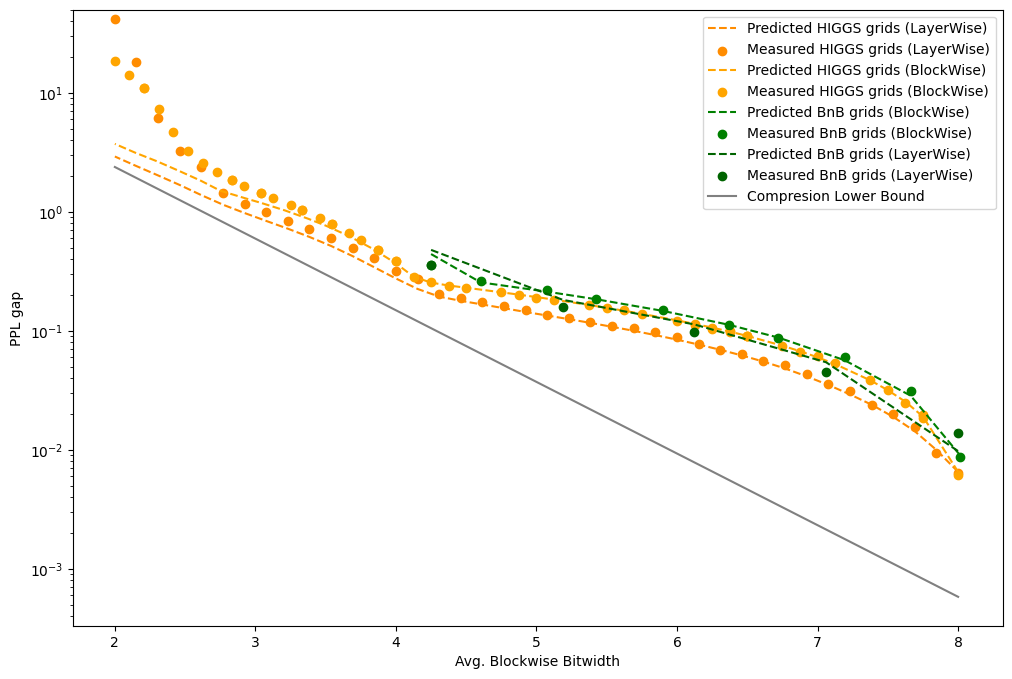

In [116]:
def get_expected_ppl_gap(slopes, grid_mses, selection):
    return (grid_mses[selection] * slopes).sum()

def get_bitwidth(weights, grid_bits, selection):
    return (weights * grid_bits[selection]).sum()

# HIGGS
temp_ppl_gaps = []
temp_bitwidths = []
for indices in higgs_layerwise_configurations:
    ppl_gap = get_expected_ppl_gap(
        layerwise_slopes,
        np.asarray([grid["mse"] for grid in higgs_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        layerwise_weights,
        np.asarray([grid["bits"] for grid in higgs_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
plt.plot(
    temp_bitwidths[order],
    temp_ppl_gaps[order] * KOSTIL * sum(slopes) / sum(layerwise_slopes),
    linestyle="--", color="darkorange", label=f"Predicted HIGGS grids (LayerWise)"
)

plt.scatter(
    higgs_layerwise_bitwisths,
    higgs_layerwise_ppls - np.min(rtn_ppls),
    color="darkorange", marker="o", label="Measured HIGGS grids (LayerWise)"
)


# HIGGS Blockwise
temp_ppl_gaps = []
temp_bitwidths = []
for indices in higgs_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in higgs_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in higgs_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
plt.plot(temp_bitwidths[order], temp_ppl_gaps[order] * KOSTIL, linestyle="--", color="orange", label=f"Predicted HIGGS grids (BlockWise)")

plt.scatter(
    higgs_bitwisths,
    higgs_ppls - np.min(rtn_ppls),
    color="orange", marker="o", label="Measured HIGGS grids (BlockWise)"
)


# BnB BlockWise
temp_ppl_gaps = []
temp_bitwidths = []
for indices in bnb_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in bnb_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in bnb_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
plt.plot(
    df["bitwidht"], # temp_bitwidths[order],
    df["solution_pred_err"] * KOSTIL, # temp_ppl_gaps[order] * KOSTIL,
    linestyle="--", color="green", label=f"Predicted BnB grids (BlockWise)"
)

plt.scatter(
    df["bitwidht"],
    df["solution_real_err"],
    color="green", marker="o", label="Measured BnB grids (BlockWise)"
)

# BnB LayerWise
plt.plot(
    bnb_layerwise_df["bitwidht"], # temp_bitwidths[order],
    bnb_layerwise_df["solution_pred_err"] * KOSTIL, # temp_ppl_gaps[order] * KOSTIL,
    linestyle="--", color="darkgreen", label=f"Predicted BnB grids (LayerWise)"
)

plt.scatter(
    bnb_layerwise_df["bitwidht"],
    bnb_layerwise_df["solution_real_err"],
    color="darkgreen", marker="o", label="Measured BnB grids (LayerWise)"
)


# Lower Bound

plt.plot(
    np.linspace(2, 8),
    [expected_ppl_gap(slopes, get_optimal_blockwise_bitwidths(slopes, bpw)) * KOSTIL for bpw in np.linspace(2, 8)],
    color="gray", label="Compresion Lower Bound",
)

plt.xlabel("Avg. Blockwise Bitwidth")
plt.ylabel("PPL gap")

plt.yscale('log')
plt.ylim(None, 50)

# plt.ylim(0, 1)

plt.legend()

In [102]:
import subprocess

for indices in tqdm(higgs_layerwise_configurations):    
    bitwidth = get_bitwidth(
        layerwise_weights,
        np.asarray([grid["bits"] for grid in higgs_grids]),
        np.asarray(indices),
    )
    
    if indices in measured_higgs_layerwise_configs:
        print(f"Skipping {bitwidth}")
        continue
    
    layerwise_string = "{" + f"""{
        ','.join(['"' + name + '":('+ str(higgs_grids[i]['edenn_d']) + ',' + str(higgs_grids[i]['edenn_n']) + ')' for name, i in zip(layerwise_names, indices)])
    }""" + "}"
    
    subprocess.check_call(
        f"CUDA_VISIBLE_DEVICES=1 python eval_real_quant.py meta-llama/Meta-Llama-3.1-8B --layerwise '{layerwise_string}' --multiquant-ckpt-path /nfs/scistore19/alistgrp/apanfero/models/higgs/Meta-Llama-3.1-8B.pt",
        shell=True,
        cwd="../kernels",
    )


  0%|          | 0/40 [00:00<?, ?it/s]

Skipping 6.1530448717948705
Skipping 5.076121794871794
Skipping 6.460737179487179
Skipping 6.0
Skipping 3.0769230769230766
Skipping 5.383814102564102
Skipping 7.229967948717948
Skipping 7.692307692307692
Skipping 3.6923076923076916
Skipping 3.999999999999999
Skipping 2.1538461538461537
Skipping 7.383814102564101
Skipping 3.230769230769231
Skipping 7.999999999999998
Skipping 6.92227564102564
Skipping 4.153846153846153
Skipping 2.3076923076923075
Skipping 3.5384615384615383


wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compression/Andrei/kernels/wandb/run-20240925_155004-wb6gdiv7
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run meta-llama/Meta-Llama-3.1-8B
wandb: ⭐️ View project at https://wandb.ai/rock-and-roll/higgs-evals-layerwise
wandb: 🚀 View run at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/wb6gdiv7
Loading checkpoint shards: 100%|██████████| 4/4 [00:04<00:00,  1.07s/it]
Token indices sequence length is longer than the specified maximum sequence length for this model (2436214 > 131072). Running this sequence through the model will result in indexing errors


Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:21<00:00,  2.55s/it]


5.734727382659912


wandb: / 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 5.22997
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 5.73473
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/wb6gdiv7
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_155004-wb6gdiv7/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:21<00:00,  2.53s/it]


6.320899963378906


wandb: / 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 3.38462
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 6.3209
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/9c749p5z
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_155219-9c749p5z/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressio

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:21<00:00,  2.56s/it]


5.755245208740234


wandb: / 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 4.92228
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 5.75525
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/orx5l0zh
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_155433-orx5l0zh/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:21<00:00,  2.56s/it]


5.767784595489502


wandb: - 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 4.76843
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 5.76778
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/841yax00
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_155650-841yax00/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:22<00:00,  2.58s/it]


5.703928470611572


wandb: / 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 5.84615
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 5.70393
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/ws8r0m90
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_155907-ws8r0m90/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:20<00:00,  2.51s/it]


8.855146408081055


wandb: / 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 2.46154
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 8.85515
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/mkdofztm
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_160124-mkdofztm/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:23<00:00,  2.62s/it]


5.616280555725098


wandb: / 0.033 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 7.84615
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 5.61628
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/bu7wy6g0
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_160340-bu7wy6g0/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:23<00:00,  2.60s/it]


5.663173198699951


wandb: / 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 6.61458
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 5.66317
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/nia3p17a
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_160601-nia3p17a/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:23<00:00,  2.61s/it]


5.658118724822998


wandb: | 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 6.76843
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 5.65812
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/upsqitxp
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_160819-upsqitxp/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:23<00:00,  2.60s/it]


5.642826080322266


wandb: / 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 7.07692
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 5.64283
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/8yp8dc7n
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_161038-8yp8dc7n/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:21<00:00,  2.54s/it]


5.811723709106445


wandb: - 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 4.30769
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 5.81172
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/pe751v18
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_161255-pe751v18/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:21<00:00,  2.56s/it]


5.781480312347412


wandb: - 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 4.61538
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 5.78148
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/e5fzj1vk
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_161514-e5fzj1vk/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:20<00:00,  2.52s/it]


6.78039026260376


wandb: / 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 2.92308
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 6.78039
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/bw2ciuld
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_161733-bw2ciuld/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:23<00:00,  2.62s/it]


5.626946926116943


wandb: / 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 7.53766
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 5.62695
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/k2j7yzz6
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_161949-k2j7yzz6/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:20<00:00,  2.53s/it]


6.017829418182373


wandb: / 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 3.84615
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 6.01783
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/imqxqyl7
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_162207-imqxqyl7/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:21<00:00,  2.54s/it]


5.795854568481445


wandb: / 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 4.46154
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 5.79585
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/cbqelp0l
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_162426-cbqelp0l/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:22<00:00,  2.58s/it]


5.712210655212402


wandb: - 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 5.69231
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 5.71221
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/50ytr5pr
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_162641-50ytr5pr/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:22<00:00,  2.59s/it]


5.676462173461914


wandb: - 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 6.30689
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 5.67646
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/y2hp23yk
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_162900-y2hp23yk/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:20<00:00,  2.51s/it]


7.995050430297852


wandb: / 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 2.61538
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 7.99505
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/kgqdqdop
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_163118-kgqdqdop/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:20<00:00,  2.51s/it]


7.059939384460449


wandb: - 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 2.76923
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 7.05994
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/lpfbc8yo
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_163333-lpfbc8yo/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:22<00:00,  2.58s/it]


5.716834545135498


wandb: / 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 5.53766
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 5.71683
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/760ny103
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_163550-760ny103/logs
wandb: Currently logged in as: black_samorez (rock-and-roll). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /nfs/scistore19/alistgrp/apanfero/linear-layer-compressi

Evaluating ...


Evaluating layer-by-layer...: 100%|██████████| 32/32 [01:19<00:00,  2.48s/it]


47.45952606201172


wandb: / 0.059 MB of 0.059 MB uploaded
wandb: Run history:
wandb:      bitwidth ▁
wandb: wikitext2_PPL ▁
wandb: 
wandb: Run summary:
wandb:      bitwidth 2.0
wandb:         model meta-llama/Meta-Llam...
wandb: wikitext2_PPL 47.45953
wandb: 
wandb: 🚀 View run meta-llama/Meta-Llama-3.1-8B at: https://wandb.ai/rock-and-roll/higgs-evals-layerwise/runs/dmutj97e
wandb: ️⚡ View job at https://wandb.ai/rock-and-roll/higgs-evals-layerwise/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjQ2MDc1NDgzNw==/version_details/v5
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20240925_163808-dmutj97e/logs


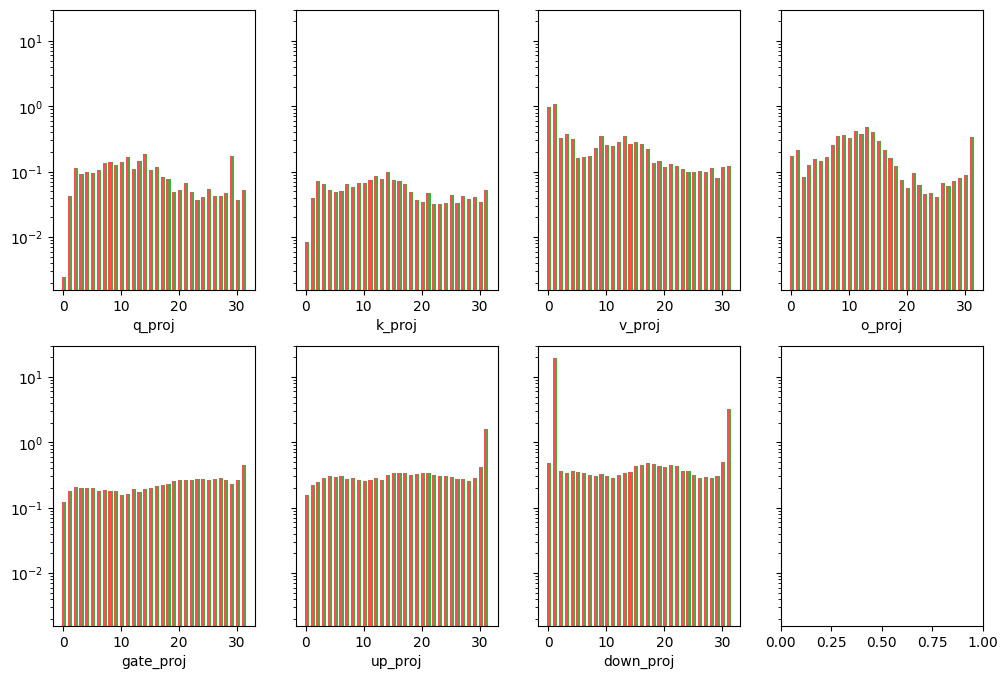

In [81]:
import re

fig, axs = plt.subplots(2, 4, sharey=True)

index = np.arange(len(layerwise_slopes.reshape(32, -1).sum(axis=-1)))

bar_width = 0.35  # Width of the bars

# Plotting the bars
for name, slope in zip(layerwise_names, layerwise_slopes):
    if "q_proj" in name:
        ax = axs[0][0]
        ax.set_xlabel("q_proj")
    elif "k_proj" in name:
        ax = axs[0][1]
        ax.set_xlabel("k_proj")
    elif "v_proj" in name:
        ax = axs[0][2]
        ax.set_xlabel("v_proj")
    elif "o_proj" in name:
        ax = axs[0][3]
        ax.set_xlabel("o_proj")
    elif "gate_proj" in name:
        ax = axs[1][0]
        ax.set_xlabel("gate_proj")
    elif "up_proj" in name:
        ax = axs[1][1]
        ax.set_xlabel("up_proj")
    elif "down_proj" in name:
        ax = axs[1][2]
        ax.set_xlabel("down_proj")
    ax.set_yscale("log")
    
    block_idx = int(re.search('[0-9]+', name).group())
    ax.bar([block_idx], slope, bar_width, color="red", alpha=0.7)
    ax.bar([block_idx + bar_width], scale_by_layer[name], bar_width, color="green", alpha=0.7)


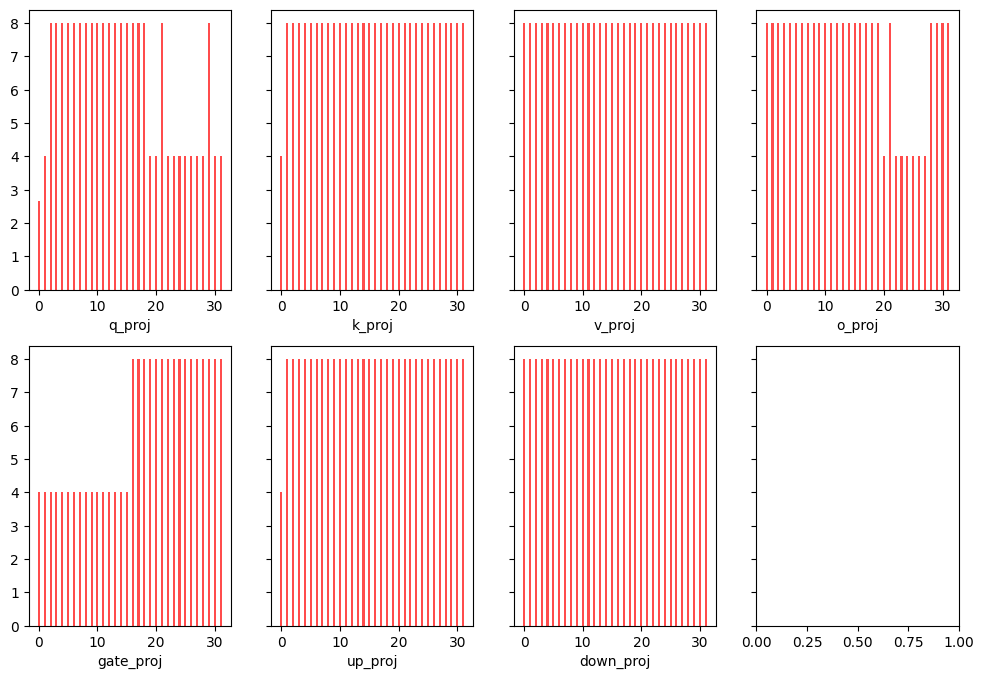

In [86]:
import re

fig, axs = plt.subplots(2, 4, sharey=True)

index = np.arange(len(layerwise_slopes.reshape(32, -1).sum(axis=-1)))

bar_width = 0.35  # Width of the bars

# Plotting the bars
for name, idx in zip(layerwise_names, indices):
    if "q_proj" in name:
        ax = axs[0][0]
        ax.set_xlabel("q_proj")
    elif "k_proj" in name:
        ax = axs[0][1]
        ax.set_xlabel("k_proj")
    elif "v_proj" in name:
        ax = axs[0][2]
        ax.set_xlabel("v_proj")
    elif "o_proj" in name:
        ax = axs[0][3]
        ax.set_xlabel("o_proj")
    elif "gate_proj" in name:
        ax = axs[1][0]
        ax.set_xlabel("gate_proj")
    elif "up_proj" in name:
        ax = axs[1][1]
        ax.set_xlabel("up_proj")
    elif "down_proj" in name:
        ax = axs[1][2]
        ax.set_xlabel("down_proj")
    # ax.set_yscale("log")
    
    block_idx = int(re.search('[0-9]+', name).group())
    ax.bar([block_idx], higgs_grids[idx]["bits"], bar_width, color="red", alpha=0.7)
